In [1]:
from glob import glob
import os
import scanpy as sc
from pathlib import Path
import pandas as pd
from anndata import AnnData

In [3]:
# 1. Point to your folder
data_dir = "."

# 2. Find all the matrix files and extract their prefixes
matrix_paths = glob(os.path.join(data_dir, "*_matrix.mtx.gz"))
prefixes = [os.path.basename(p).replace("_matrix.mtx.gz", "") 
            for p in matrix_paths]
print(prefixes)

['GSM4147094_UMM061', 'GSM4147097_UMM064', 'GSM4147100_UMM067L', 'GSM4147091_BSSR0022', 'GSM4147099_UMM066', 'GSM4147101_UMM069', 'GSM4147093_UMM059', 'GSM4147096_UMM063', 'GSM4147092_UMM041L', 'GSM4147095_UMM062', 'GSM4147098_UMM065']


In [3]:

# Set the path to your data directory
path = Path('.')  # Change this to your actual data path

samples = []
for sample in prefixes:
    # Read the matrix
    s = sc.read_mtx(path / f'{sample}_matrix.mtx.gz').T  # Transpose to match cells as obs

    # Read gene names
    genes = pd.read_csv(path / f'{sample}_genes.tsv.gz', header=None, sep='\t')
    s.var_names = genes[0]
    s.var['gene_symbols'] = genes[1].values

    # Read cell barcodes
    s.obs_names = pd.read_csv(path / f'{sample}_barcodes.tsv.gz', header=None)[0].values

    # Add sample ID to keep track after concatenation
    s.obs['sample'] = str(sample)

    samples.append(s)

# Concatenate all samples into one AnnData object
adata = AnnData.concatenate(*samples, batch_key="sample_id")

/omics/odcf/analysis/hipo/hipo_021/Rhode/environments/3_8/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [7]:
#adata = AnnData.concatenate(*samples, batch_key="sample_id")
adata.obs

,sample,sample_id,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,...,library_strategy,relation,supplementary_file_1,supplementary_file_2,supplementary_file_3,age at diagnosis:ch1,gep class:ch1,sample type:ch1,Sex:ch1,tissue:ch1
AAACCTGAGAAACCAT-1-0,GSM4147094_UMM061,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGAAACCGC-1-0,GSM4147094_UMM061,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGAAACCTA-1-0,GSM4147094_UMM061,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGAAACGAG-1-0,GSM4147094_UMM061,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGAAACGCC-1-0,GSM4147094_UMM061,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCTTTACAC-1-10,GSM4147098_UMM065,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TTTGTCATCTTTACGT-1-10,GSM4147098_UMM065,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TTTGTCATCTTTAGGG-1-10,GSM4147098_UMM065,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TTTGTCATCTTTAGTC-1-10,GSM4147098_UMM065,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
metadata = pd.read_csv("geo_metadata.csv", index_col=0)  # Assumes index = cell IDs
#metadata

In [ ]:
##not sure if this is required... check and delete later
#adata.obs = adata.obs.join(metadata)

In [ ]:
# e.g. after building df_metadata, rename its sample‐column:
#df_metadata = metadata.rename(columns={"sample_id": "sample_id"})

In [ ]:
# set index on that column for easy joining
#df_metadata = df_metadata.set_index("sample_id")

In [ ]:
#adata.obs = adata.obs.join(
#    df_metadata, 
#    on="sample",       # matches adata.obs["batch"] to geo_meta.index
#    how="left"
#)

In [14]:
df_metadata = metadata

In [15]:
df_metadata['ID'] = df_metadata['geo_accession'] +'_'+ df_metadata.index

In [ ]:
df_metadata

In [17]:
df_metadata['ID'] = df_metadata['ID'].str.replace('_single cell RNAseq', '', regex=False)
df_metadata['ID']

title
BSSR0022_single cell RNAseq    GSM4147091_BSSR0022
UMM041L_single cell RNAseq      GSM4147092_UMM041L
UMM059_single cell RNAseq        GSM4147093_UMM059
UMM061_single cell RNAseq        GSM4147094_UMM061
UMM062_single cell RNAseq        GSM4147095_UMM062
UMM063_single cell RNAseq        GSM4147096_UMM063
UMM064_single cell RNAseq        GSM4147097_UMM064
UMM065_single cell RNAseq        GSM4147098_UMM065
UMM066_single cell RNAseq        GSM4147099_UMM066
UMM067L_single cell RNAseq      GSM4147100_UMM067L
UMM069_single cell RNAseq        GSM4147101_UMM069
Name: ID, dtype: object

In [18]:
df_metadata = df_metadata.set_index('ID')
df_metadata

,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,characteristics_ch1.1,...,library_strategy,relation,supplementary_file_1,supplementary_file_2,supplementary_file_3,age at diagnosis:ch1,gep class:ch1,sample type:ch1,Sex:ch1,tissue:ch1
ID,,,,,,,,,,,,,,,,,,,,,
GSM4147091_BSSR0022,GSM4147091,Public on Jan 24 2020,Nov 01 2019,Jan 24 2020,SRA,1,human uveal melanoma_metastatic,Homo sapiens,tissue: human uveal melanoma,sample type: metastatic,...,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,86,1,metastatic,F,human uveal melanoma
GSM4147092_UMM041L,GSM4147092,Public on Jan 24 2020,Nov 01 2019,Jan 24 2020,SRA,1,human uveal melanoma_metastatic,Homo sapiens,tissue: human uveal melanoma,sample type: metastatic,...,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,71,2,metastatic,F,human uveal melanoma
GSM4147093_UMM059,GSM4147093,Public on Jan 24 2020,Nov 01 2019,Jan 24 2020,SRA,1,human uveal melanoma_primary,Homo sapiens,tissue: human uveal melanoma,sample type: primary,...,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,69,2,primary,M,human uveal melanoma
GSM4147094_UMM061,GSM4147094,Public on Jan 24 2020,Nov 01 2019,Jan 24 2020,SRA,1,human uveal melanoma_primary,Homo sapiens,tissue: human uveal melanoma,sample type: primary,...,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,66,2,primary,M,human uveal melanoma
GSM4147095_UMM062,GSM4147095,Public on Jan 24 2020,Nov 01 2019,Jan 24 2020,SRA,1,human uveal melanoma_primary,Homo sapiens,tissue: human uveal melanoma,sample type: primary,...,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,77,1,primary,M,human uveal melanoma
GSM4147096_UMM063,GSM4147096,Public on Jan 24 2020,Nov 01 2019,Jan 24 2020,SRA,1,human uveal melanoma_primary,Homo sapiens,tissue: human uveal melanoma,sample type: primary,...,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,44,2,primary,F,human uveal melanoma
GSM4147097_UMM064,GSM4147097,Public on Jan 24 2020,Nov 01 2019,Jan 24 2020,SRA,1,human uveal melanoma_primary,Homo sapiens,tissue: human uveal melanoma,sample type: primary,...,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,53,2,primary,M,human uveal melanoma
GSM4147098_UMM065,GSM4147098,Public on Jan 24 2020,Nov 01 2019,Jan 24 2020,SRA,1,human uveal melanoma_primary,Homo sapiens,tissue: human uveal melanoma,sample type: primary,...,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4147...,80,1,primary,F,human uveal melanoma
GSM4147099_UMM066,GSM4147099,Public on Jan 24 2020,Nov 01 2019,Jan 24 2020,SRA,1,human uveal melanoma_primary,Homo sapiens,tissue: human uveal melanoma,sample type: primary,...,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM41

In [19]:
# If your per-cell metadata already includes 'sample' or 'sample_id'
adata.obs['condition'] = adata.obs['sample'].map(df_metadata['sample type:ch1'])
adata.obs['sex'] = adata.obs['sample'].map(df_metadata['Sex:ch1'])
adata.obs['age'] = adata.obs['sample'].map(df_metadata['age at diagnosis:ch1'])

In [21]:
adata.obs

,sample,sample_id,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,...,supplementary_file_2,supplementary_file_3,age at diagnosis:ch1,gep class:ch1,sample type:ch1,Sex:ch1,tissue:ch1,condition,sex,age
AAACCTGAGAAACCAT-1-0,GSM4147094_UMM061,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,primary,M,66
AAACCTGAGAAACCGC-1-0,GSM4147094_UMM061,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,primary,M,66
AAACCTGAGAAACCTA-1-0,GSM4147094_UMM061,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,primary,M,66
AAACCTGAGAAACGAG-1-0,GSM4147094_UMM061,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,primary,M,66
AAACCTGAGAAACGCC-1-0,GSM4147094_UMM061,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,primary,M,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCTTTACAC-1-10,GSM4147098_UMM065,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,primary,F,80
TTTGTCATCTTTACGT-1-10,GSM4147098_UMM065,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,primary,F,80
TTTGTCATCTTTAGGG-1-10,GSM4147098_UMM065,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,primary,F,80
TTTGTCATCTTTAGTC-1-10,GSM4147098_UMM065,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,primary,F,80


In [7]:
#adata.write("durante.h5ad")

adata = sc.read_h5ad("/omics/odcf/analysis/hipo/hipo_021/Rhode/um/dataset_vae/external_dataset/durante/durante.h5ad")



In [9]:
adata.obs

,sample,sample_id,condition,sex,age
AAACCTGAGAAACCAT-1-0,GSM4147094_UMM061,0,primary,M,66
AAACCTGAGAAACCGC-1-0,GSM4147094_UMM061,0,primary,M,66
AAACCTGAGAAACCTA-1-0,GSM4147094_UMM061,0,primary,M,66
AAACCTGAGAAACGAG-1-0,GSM4147094_UMM061,0,primary,M,66
AAACCTGAGAAACGCC-1-0,GSM4147094_UMM061,0,primary,M,66
...,...,...,...,...,...
TTTGTCATCTTTACAC-1-10,GSM4147098_UMM065,10,primary,F,80
TTTGTCATCTTTACGT-1-10,GSM4147098_UMM065,10,primary,F,80
TTTGTCATCTTTAGGG-1-10,GSM4147098_UMM065,10,primary,F,80
TTTGTCATCTTTAGTC-1-10,GSM4147098_UMM065,10,primary,F,80


In [73]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

adata.var['mt'] = adata.var_names.str.startswith('MT-')  # mitochondrial genes
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)

# Normalize and log transform
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Identify highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]


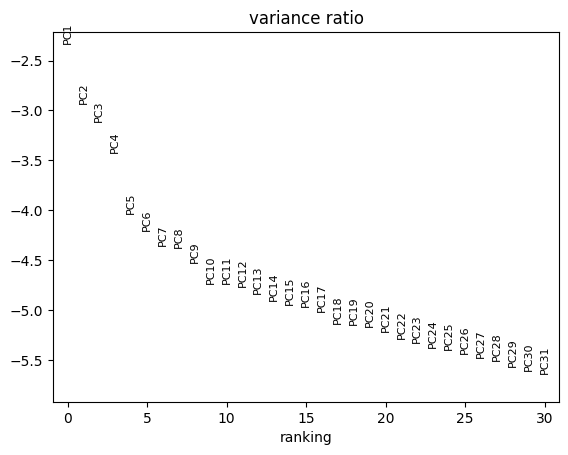

In [76]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)


In [79]:
# After PCA is done
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=)


/omics/odcf/analysis/hipo/hipo_021/Rhode/environments/3_8/lib/python3.8/site-packages/umap/distances.py:1053: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/omics/odcf/analysis/hipo/hipo_021/Rhode/environments/3_8/lib/python3.8/site-packages/umap/distances.py:1061: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/omics/odcf/analysis/hipo/

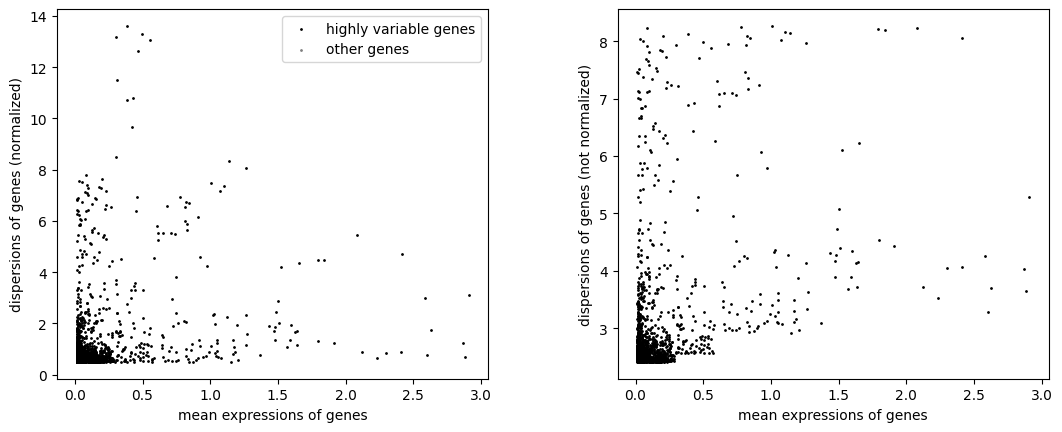

In [80]:
sc.pl.highly_variable_genes(adata)


/omics/odcf/analysis/hipo/hipo_021/Rhode/environments/3_8/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/omics/odcf/analysis/hipo/hipo_021/Rhode/environments/3_8/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


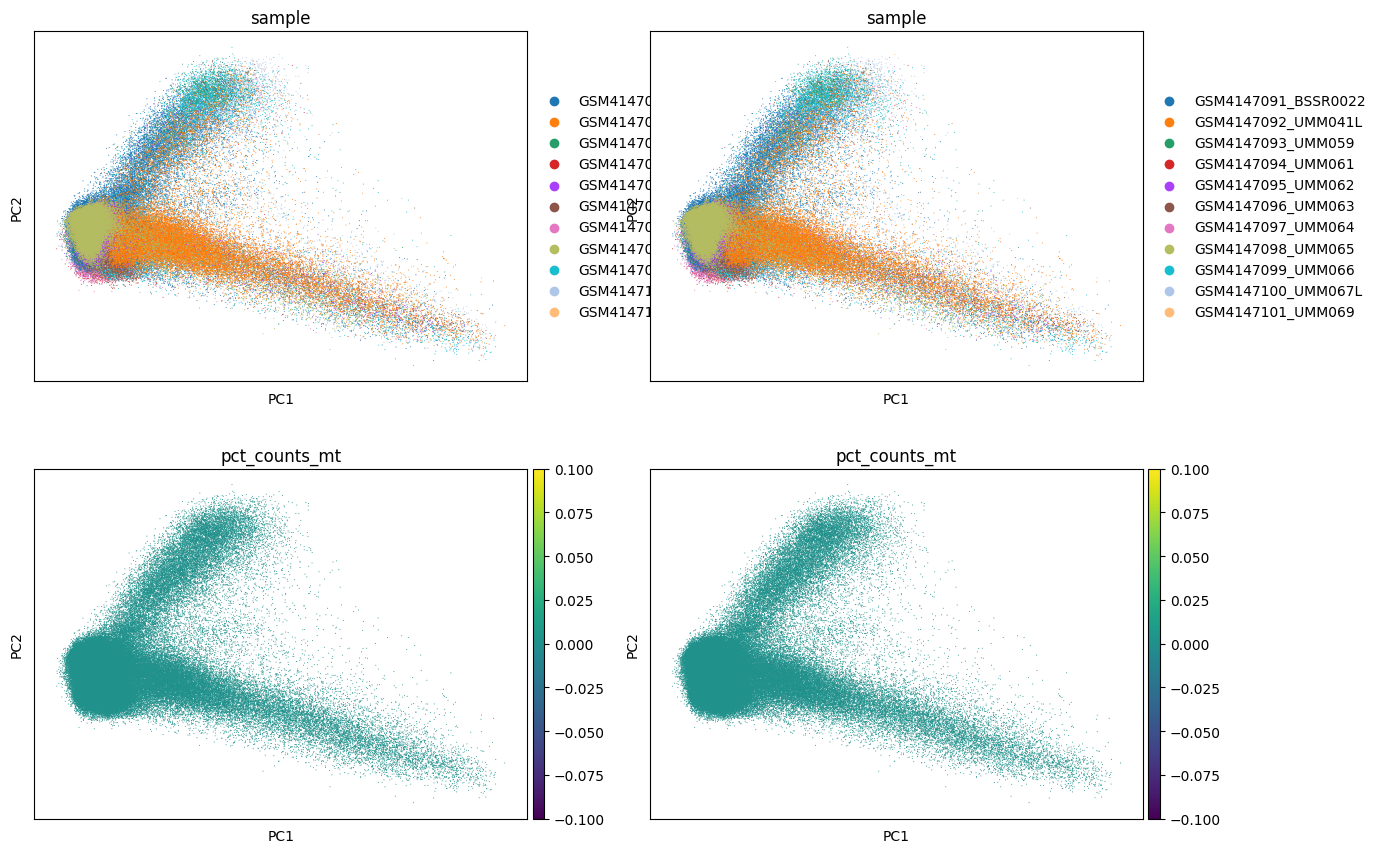

In [85]:
sc.pl.pca(
    adata,
   color=["sample", "sample", "pct_counts_mt", "pct_counts_mt"],
   # dimensions=[(0, 1), (2, 3), (0, 1), (2, 3)],
    ncols=2,
    size=2,
)

In [86]:
sc.pp.neighbors(adata)


In [87]:
sc.tl.umap(adata)

/omics/odcf/analysis/hipo/hipo_021/Rhode/environments/3_8/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


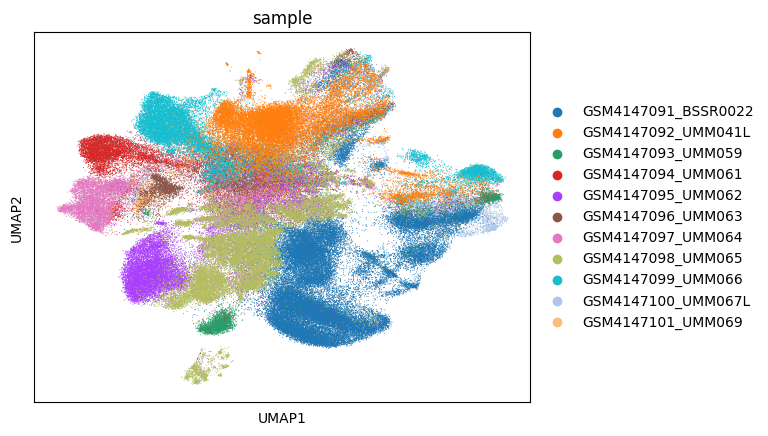

In [88]:
sc.pl.umap(
    adata,
    color="sample",
    # Setting a smaller point size to get prevent overlap
    size=2,
)

In [89]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(adata, flavor="igraph", n_iterations=2)
sc.pl.umap(adata, color=["leiden"])

TypeError: __init__() got an unexpected keyword argument 'flavor'